 **Healthcare Analytics Data**\

**Prediction of best fit Model and Complete Exploratory Data Analysis**\
Performed by : Ishrat Un Nisa and Sarfaraz Abbasi\
Dated : January 2024\
email : ishratbadar@gmail.com, SarfarazAAbbasi@Gmail.Com

## Problem Statement
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.
Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.
# About Dataset
train_data.csv – File containing features related to patient, hospital and Length of stay on case basis
train_data_dictonary.csv – File containing the information of the features in train file

Test Set
test_data.csv – File containing features related to patient, hospital. Need to predict the Length of stay for each case_id

Sample Submission:

case_id: Unique id for each case

Stay: Length of stay for the patient w.r.t each case id in test data

Evaluation Metric
The evaluation metric for this hackathon is 100*Accuracy Score.

Acknowledgements
More details can be found on Analytics Vidhya website who conducted the hackathon.
https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics-ii/#ProblemStatement

# Objective:
Exploratory Data Analysis (EDA) to analyze data for checking patterns and getting insight from it

Kernel : Python 3.12.1

## To do list
1. Import libraries
2. Load dataset
3. Analyze and understanding dataset (Anomalies, relationship, missing values, duplicate values etc)
4. Remove anamolies from data by dealing missing data, duplicate data and other information
5. Feature engineering
6. Getting insight from data by applying various techniques 
7. Modeling and predicting 

# 1. Import following libraries
 - Panadas
 - Numpy
 - Matplotlib
 - Seaborn
 - Scipy

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# import all relevant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# To show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

# 2. Load Dataset

In [56]:
# load dataset
df_train = pd.read_csv('./Data/train_data.csv')
df_test = pd.read_csv('./Data/test_data.csv')
# df_train = pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data.csv')
# df_test = pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/test_data.csv')

# To check complete dataset (column wise and row wise)
pd.set_option('display.max_columns', None)    # this is to display all the columns in the dataframe
# pd.set_option('display.max_rows', None)       # this is to display all the rows in the dataframe

# 3. Analyze data

In [57]:
# To check data from training dataset
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [58]:
# to check details of training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

---
# Observation 1
1. The 04 numerical columns are Ids `Hospital_code`, `City_Code_Hospital`, `City_Code_Patient` and `Bed Grade`,
So we have to convert them in Strings in both Training and Test datasets 
2. There are some missing values in 02 columns `Bed Grade` and `City_Code_Patient`

In [59]:
df_train['Hospital_code'] = df_train['Hospital_code'].astype('str')
df_train['City_Code_Hospital'] = df_train['City_Code_Hospital'].astype('str')
df_train['Bed Grade'] = df_train['Bed Grade'].astype('Int64')
df_train['City_Code_Patient'] = df_train['City_Code_Patient'].astype('str')

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  Int64  
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [61]:
df_train[['City_Code_Patient']].value_counts()

City_Code_Patient
8.0                  124011
2.0                   38869
1.0                   26377
7.0                   23807
5.0                   20079
4.0                   15380
9.0                   11795
15.0                   8950
10.0                   8174
6.0                    6005
12.0                   5647
nan                    4532
3.0                    3772
23.0                   3698
14.0                   2927
16.0                   2254
13.0                   1625
21.0                   1602
20.0                   1409
18.0                   1404
19.0                   1028
26.0                   1023
25.0                    798
27.0                    771
11.0                    658
28.0                    521
22.0                    405
24.0                    360
30.0                    133
29.0                     98
33.0                     78
31.0                     59
37.0                     57
32.0                     52
34.0                     46
35

In [62]:
df_test['Hospital_code'] = df_test['Hospital_code'].astype('str')
df_test['City_Code_Hospital'] = df_test['City_Code_Hospital'].astype('str')
df_test['Bed Grade'] = df_test['Bed Grade'].astype('Int64')
df_test['City_Code_Patient'] = df_test['City_Code_Patient'].astype('str')

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  object 
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  object 
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  Int64  
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [64]:
# To check data from test dataset
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [65]:
# to check details of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  object 
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  object 
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  Int64  
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [66]:
# check the shape of training and test dataset
print('shape of training data set: ', df_train.shape)
print('shape of test data set: ', df_test.shape)

shape of training data set:  (318438, 18)
shape of test data set:  (137057, 17)


In [67]:
df_train[['patientid']].nunique()

patientid    92017
dtype: int64

---
# Observation 2
1. It is noticed that after converting `City_Code_Patient` in string, the missing values  are replaced with 'nan' string
2. There are more than one records or rows of one patient `patientid` 

In [68]:
# Find the Structure or size of Dataset and check the Descriptive Analysis
print('Shape of dataset : ',df_train.shape)
df_train.describe()

Shape of dataset :  (318438, 18)


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318325.0,318438.000000,318438.000000,318438.000000
mean,159219.500000,3.197627,2.625807,65747.579472,3.284099,4880.749392
std,91925.276848,1.168171,0.873146,37979.936440,1.764061,1086.776254
min,1.000000,0.000000,1.0,1.000000,0.000000,1800.000000
25%,79610.250000,2.000000,2.0,32847.000000,2.000000,4186.000000
50%,159219.500000,3.000000,3.0,65724.500000,3.000000,4741.000000
75%,238828.750000,4.000000,3.0,98470.000000,4.000000,5409.000000
max,318438.000000,24.000000,4.0,131624.000000,32.000000,11008.000000


In [69]:
# Find the Structure or size of Dataset and check the Descriptive Analysis
print('Shape of dataset : ',df_test.shape)
df_test.describe()

Shape of dataset :  (137057, 17)


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137022.0,137057.000000,137057.000000,137057.000000
mean,386967.000000,3.192686,2.634489,65877.903515,3.284531,4869.731097
std,39565.092259,1.164250,0.869295,37942.997623,1.777270,1080.766723
min,318439.000000,0.000000,1.0,3.000000,0.000000,1800.000000
25%,352703.000000,2.000000,2.0,32945.000000,2.000000,4178.000000
50%,386967.000000,3.000000,3.0,65786.000000,3.000000,4731.000000
75%,421231.000000,4.000000,3.0,98851.000000,4.000000,5398.000000
max,455495.000000,21.000000,4.0,131618.000000,32.000000,11920.000000


In [70]:
# Checking for missing values in Training dataset
df_train.isnull().sum().any()

True

In [71]:
df_train.loc[:, df_train.isna().any()].isna().sum().sort_values(ascending=False)

Bed Grade    113
dtype: int64

In [72]:
df_test.loc[:, df_test.isna().any()].isna().sum().sort_values(ascending=False)

Bed Grade    35
dtype: int64

In [73]:
# Check null/missing values inside dataset in descending order
df_train.isnull().sum().sort_values(ascending=False)

Bed Grade                            113
Hospital_code                          0
Admission_Deposit                      0
Age                                    0
Visitors with Patient                  0
Severity of Illness                    0
Type of Admission                      0
City_Code_Patient                      0
patientid                              0
case_id                                0
Ward_Facility_Code                     0
Ward_Type                              0
Department                             0
Available Extra Rooms in Hospital      0
Hospital_region_code                   0
City_Code_Hospital                     0
Hospital_type_code                     0
Stay                                   0
dtype: int64

<Axes: >

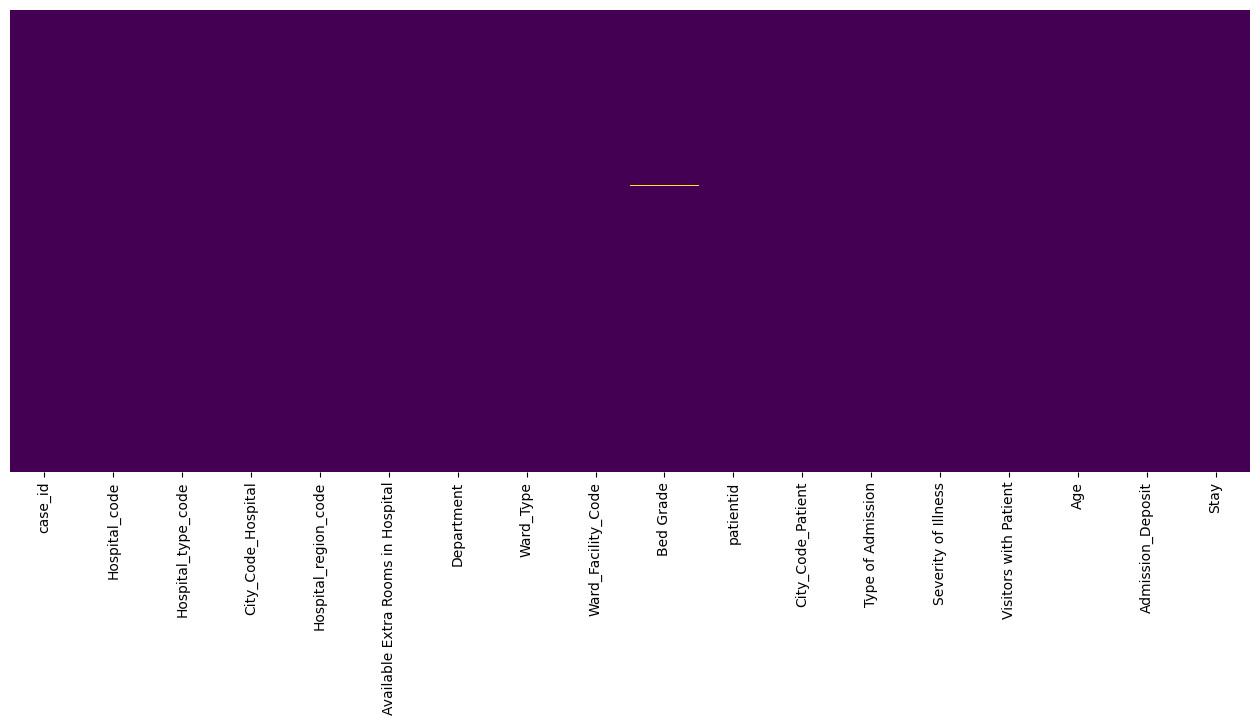

In [74]:
# Plot missing values in Training dataset
plt.figure(figsize = (16,6))
sns.heatmap(df_train.isnull(), yticklabels= False, cbar= False, cmap='viridis')

<Axes: >

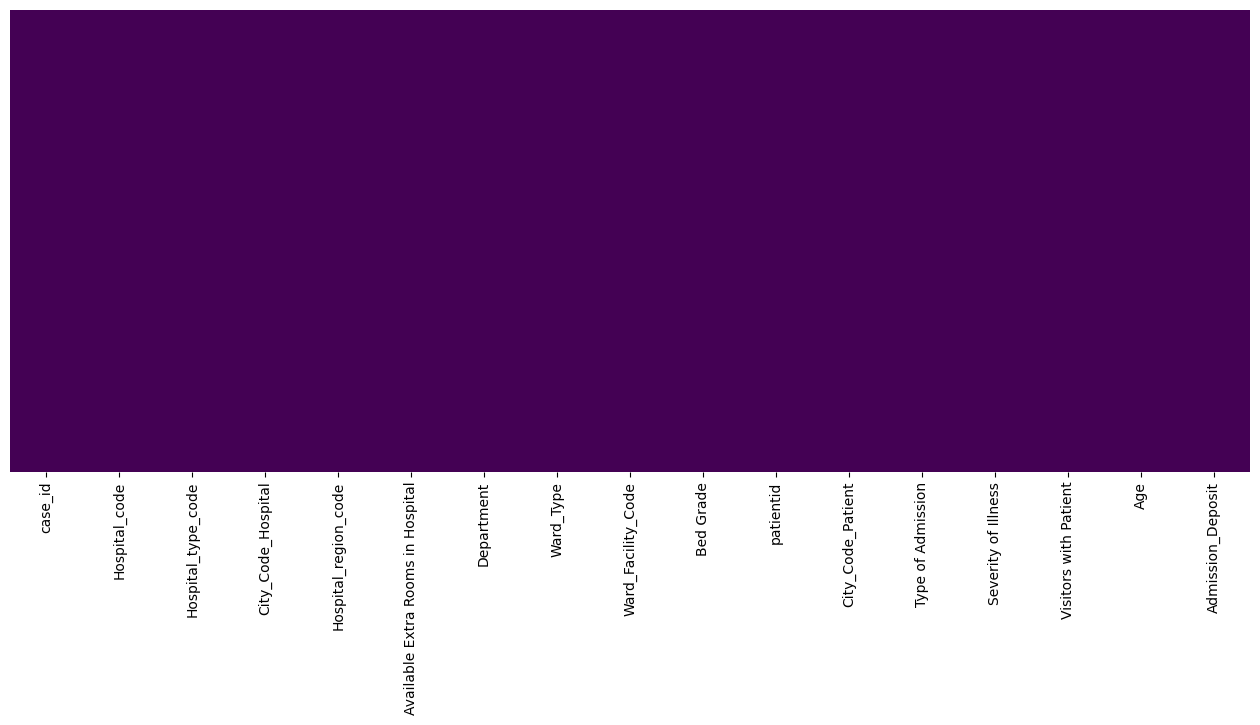

In [75]:
# Plot missing values in Test dataset
plt.figure(figsize = (16,6))
sns.heatmap(df_test.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [76]:
# Checking for missing values in test dataset
df_test.isnull().sum().any()

True

In [77]:
# find missing values in Training dataset according to their percentage
missing_perc = (df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False)
missing_perc[missing_perc != 0]

Bed Grade    0.035486
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Values in each columns')

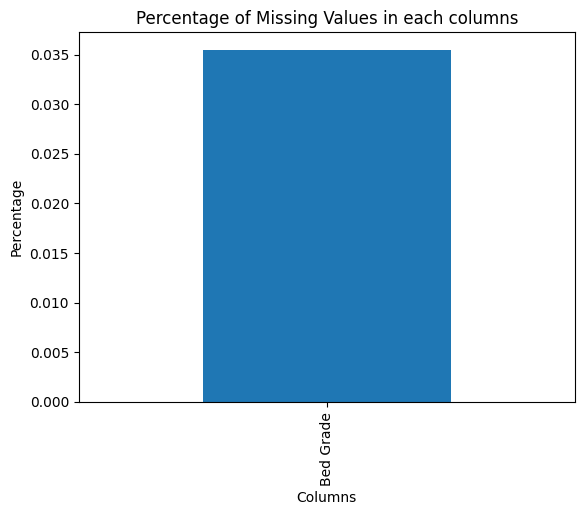

In [78]:
# Plot the null values in Training Dataset by their percentage
missing_perc[missing_perc != 0].plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title('Percentage of Missing Values in each columns')

In [79]:
# find missing values in Test dataset according to their percentage
missing_perc_test = (df_test.isnull().sum()/len(df_test)*100).sort_values(ascending=False)
missing_perc_test[missing_perc_test != 0]

Bed Grade    0.025537
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Values in each columns')

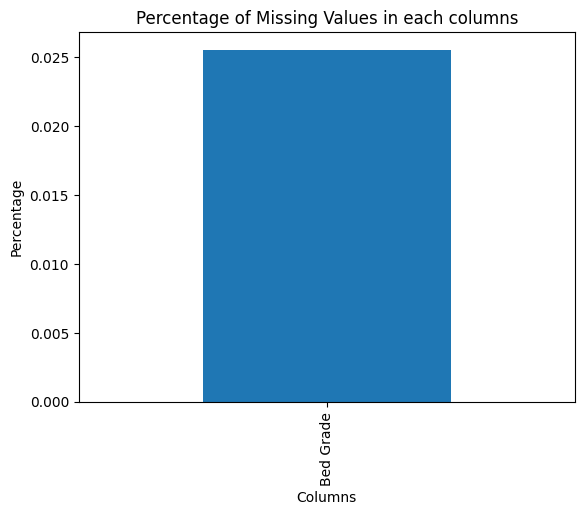

In [80]:
# Plot the null values in Test Dataset by their percentage
missing_perc_test[missing_perc_test != 0].plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title('Percentage of Missing Values in each columns')

In [81]:
# check any duplication
df_train.duplicated(subset=df_train.columns.difference(['case_id'])).any()

True

In [82]:
df_train.duplicated(subset=df_train.columns.difference(['case_id'])).sum()

65

In [83]:
df_train.duplicated(subset=df_train.columns).sum()

0

In [84]:
df_test.duplicated(subset=df_test.columns.difference(['case_id'])).sum()

28

In [85]:
df_train[df_train.duplicated(subset=df_train.columns.difference(['case_id']), keep=False)]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
1178,1179,28,b,11,X,2,gynecology,R,F,4,42891,8.0,Trauma,Moderate,4,81-90,4944.0,31-40
1179,1180,28,b,11,X,2,gynecology,R,F,4,42891,8.0,Trauma,Moderate,4,81-90,4944.0,31-40
2355,2356,13,a,5,Z,4,anesthesia,R,F,4,64276,1.0,Trauma,Extreme,3,41-50,4025.0,71-80
2356,2357,13,a,5,Z,4,anesthesia,R,F,4,64276,1.0,Trauma,Extreme,3,41-50,4025.0,71-80
2357,2358,23,a,6,X,2,anesthesia,R,F,2,64276,1.0,Urgent,Extreme,6,41-50,3538.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298232,298233,23,a,6,X,2,gynecology,Q,F,4,82567,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
298233,298234,23,a,6,X,2,gynecology,Q,F,4,82567,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
298234,298235,23,a,6,X,2,gynecology,Q,F,4,82567,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
304085,304086,22,g,9,Y,1,TB & Chest disease,S,B,1,50413,6.0,Urgent,Moderate,4,31-40,5317.0,21-30


---
# Observation 3
1. There are 65 duplicate rows in Training Dataset, which will make class imbalance, So We have to remove them.
2. There are 28 duplicate rows in Test Dataset. It is not neccessary to remove duplication from test dataset 

# 4. Remove Anamolies from Dataset

In [86]:
df_train.drop_duplicates(subset=df_train.columns.difference(['case_id']), inplace=True)
print(df_train.shape)
df_train.head()

(318373, 18)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


## Mileston:
Duplicate values are successfully removed from Training dataset

In [87]:
# first we have to check the dataset
df_train['Stay'].value_counts().sort_index()

Stay
0-10                  23599
11-20                 78135
21-30                 87488
31-40                 55152
41-50                 11743
51-60                 35000
61-70                  2744
71-80                 10246
81-90                  4836
91-100                 2764
More than 100 Days     6666
Name: count, dtype: int64

In [88]:
df_train[['Stay','Age']].value_counts().sort_index()

Stay                Age   
0-10                0-10       615
                    11-20     1552
                    21-30     3467
                    31-40     4913
                    41-50     4726
                              ... 
More than 100 Days  51-60     1194
                    61-70      889
                    71-80     1060
                    81-90      322
                    91-100      63
Name: count, Length: 110, dtype: int64

In [89]:
df_train['Age'].value_counts().sort_index()

Age
0-10       6254
11-20     16765
21-30     40838
31-40     63630
41-50     63739
51-60     48504
61-70     33678
71-80     35781
81-90      7884
91-100     1300
Name: count, dtype: int64

In [90]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [91]:
df_train['Severity of Illness'].value_counts()

Severity of Illness
Moderate    175806
Minor        85859
Extreme      56708
Name: count, dtype: int64

In [92]:
df_train['Department'].value_counts()

Department
gynecology            249443
anesthesia             29641
radiotherapy           28508
TB & Chest disease      9581
surgery                 1200
Name: count, dtype: int64

In [93]:
df_train['Ward_Type'].value_counts()

Ward_Type
R    127916
Q    106159
S     77766
P      5046
T      1477
U         9
Name: count, dtype: int64

In [94]:
df_train['Bed Grade'].value_counts().sort_index()

Bed Grade
1     26497
2    123654
3    110564
4     57545
Name: count, dtype: Int64

Check Unique values in all the columns along with maximum and minimum values in the Numerical columns

In [95]:
# Check Unique values, data type of each column and Minimum and Maximum values of Numerical columns
for column in df_train.columns:
    unique_values = df_train[column].unique()
    type_value = df_train[column].dtype
    if len(unique_values) > 10:
        unique_values = unique_values[:10]
    total_unique_values = df_train[column].nunique()
    print(f"Data Type of {column}: {type_value}")
    print(f"Total Unique values in {column}: {total_unique_values}")
    if (df_train[column].dtype == 'int64') or (df_train[column].dtype == 'float64'):
       print(f"Minimum value: {df_train[column].min()},   Maximum value: {df_train[column].max()}")
    print(f"Unique values in {column}: {unique_values}\n")
    

Data Type of case_id: int64
Total Unique values in case_id: 318373
Minimum value: 1,   Maximum value: 318438
Unique values in case_id: [ 1  2  3  4  5  6  7  8  9 10]

Data Type of Hospital_code: object
Total Unique values in Hospital_code: 32
Unique values in Hospital_code: ['8' '2' '10' '26' '23' '32' '1' '22' '16' '9']

Data Type of Hospital_type_code: object
Total Unique values in Hospital_type_code: 7
Unique values in Hospital_type_code: ['c' 'e' 'b' 'a' 'f' 'd' 'g']

Data Type of City_Code_Hospital: object
Total Unique values in City_Code_Hospital: 11
Unique values in City_Code_Hospital: ['3' '5' '1' '2' '6' '9' '10' '4' '11' '7']

Data Type of Hospital_region_code: object
Total Unique values in Hospital_region_code: 3
Unique values in Hospital_region_code: ['Z' 'X' 'Y']

Data Type of Available Extra Rooms in Hospital: int64
Total Unique values in Available Extra Rooms in Hospital: 18
Minimum value: 0,   Maximum value: 24
Unique values in Available Extra Rooms in Hospital: [ 3  2

Data Type of City_Code_Patient: object
Total Unique values in City_Code_Patient: 38
Unique values in City_Code_Patient: ['7.0' '8.0' '2.0' '5.0' '6.0' '3.0' '4.0' '1.0' '9.0' '14.0']

Data Type of Type of Admission: object
Total Unique values in Type of Admission: 3
Unique values in Type of Admission: ['Emergency' 'Trauma' 'Urgent']

Data Type of Severity of Illness: object
Total Unique values in Severity of Illness: 3
Unique values in Severity of Illness: ['Extreme' 'Moderate' 'Minor']

Data Type of Visitors with Patient: int64
Total Unique values in Visitors with Patient: 28
Minimum value: 0,   Maximum value: 32
Unique values in Visitors with Patient: [ 2  4  3  8  6  7 13  5  1 10]

Data Type of Age: object
Total Unique values in Age: 10
Unique values in Age: ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']

Data Type of Admission_Deposit: float64
Total Unique values in Admission_Deposit: 7300
Minimum value: 1800.0,   Maximum value: 11008.0
Unique v

Admission_Deposit
Minimum value: 1800.0,   Maximum value: 11008.0
Skew : 0.93


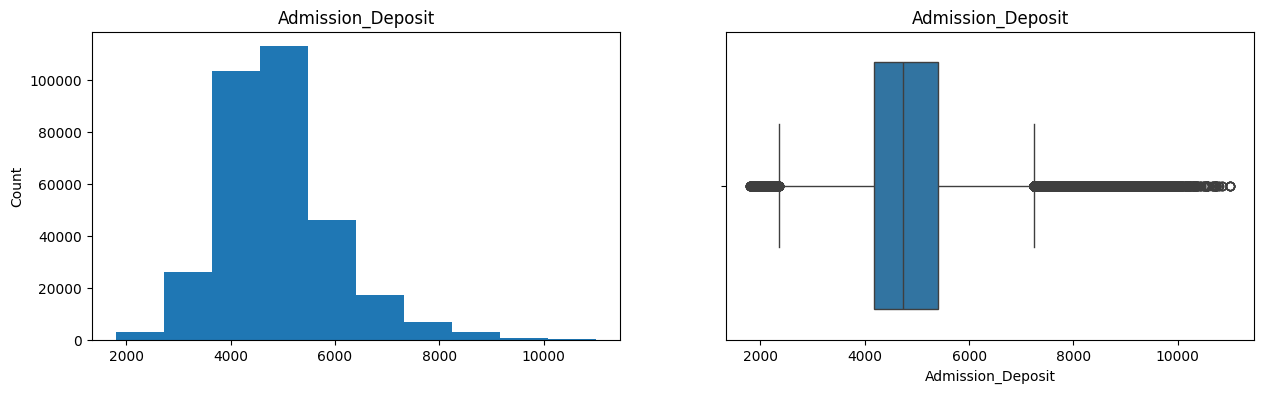

Available Extra Rooms in Hospital
Minimum value: 0,   Maximum value: 24
Skew : 0.97


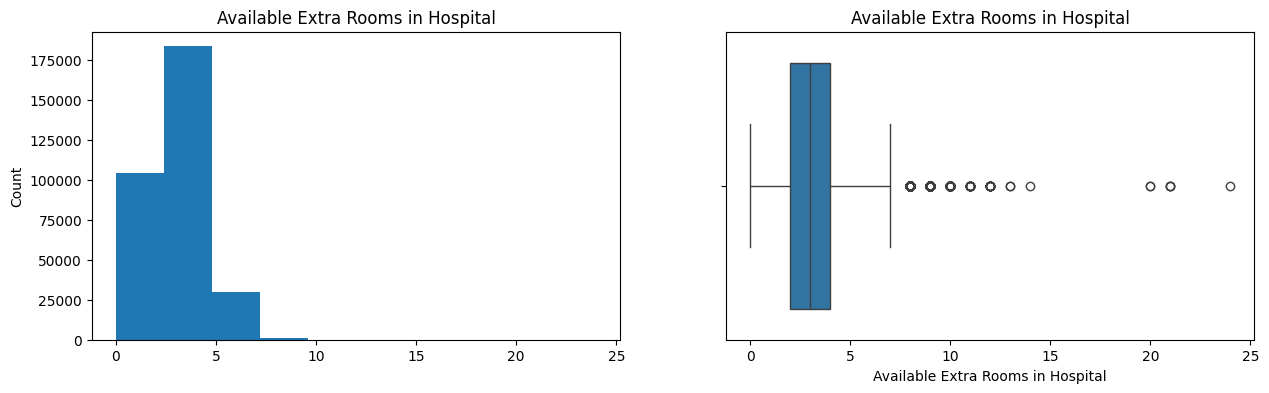

Bed Grade
Minimum value: 1,   Maximum value: 4
Skew : 0.05


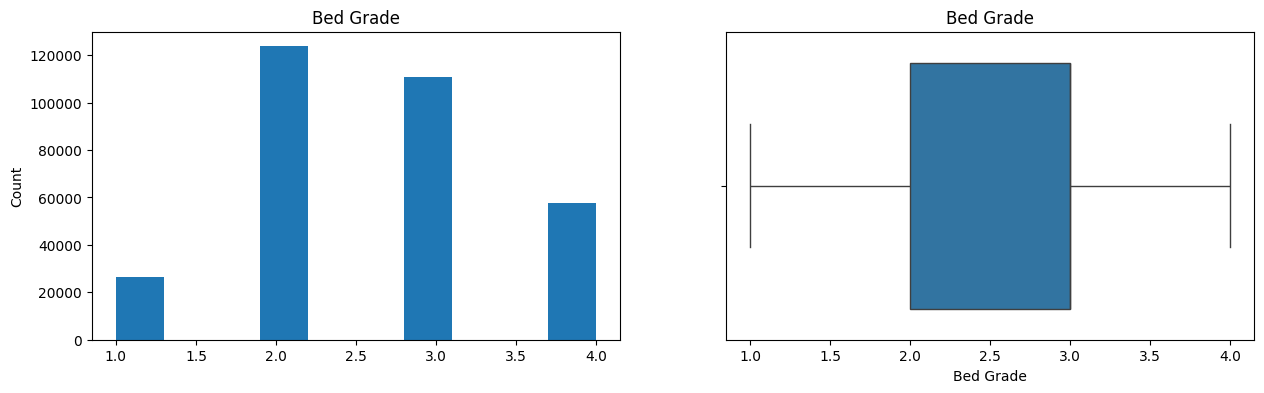

Visitors with Patient
Minimum value: 0,   Maximum value: 32
Skew : 3.14


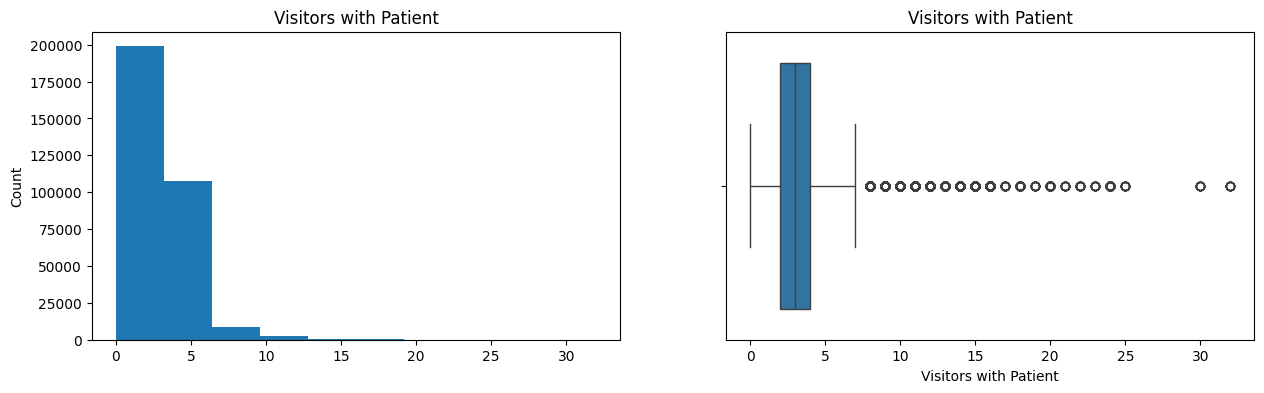

In [96]:
# Lets separate Numerical and categorical columns to visualize properly

num_col_train = df_train.select_dtypes(include=np.number).columns.difference(['case_id','patientid'])
cat_col_train = df_train.select_dtypes(include=['object','category']).columns
# Visualize Numerical columns

for col in num_col_train:
    print(col)
    print(f"Minimum value: {df_train[col].min()},   Maximum value: {df_train[col].max()}")  
    print('Skew :', round(df_train[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    df_train[col].hist(grid = False)
    # sns.histplot(data=df_train, x=df_train[col], kde=True)
    plt.ylabel('Count')
    plt.title(col)
    plt.subplot(1,2,2)
    plt.title(col)
    sns.boxplot(x=df_train[col])
    plt.show()

In [97]:
# Print Categorical columns and their value counts
print(cat_col_train)
for i,col in enumerate(cat_col_train):
    print(df_train[col].value_counts())
    print('\n')

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')
Hospital_code
26    33075
23    26553
19    21210
6     20421
14    17328
11    17327
28    17135
27    14242
9     11510
29    11307
12    11295
32    10703
25     9833
10     9433
15     9256
21     8147
24     7992
3      7110
17     5501
5      5261
1      5246
13     5231
2      5100
30     5002
22     4275
31     3967
16     3671
8      3663
18     3630
20     1405
7      1305
4      1239
Name: count, dtype: int64


Hospital_type_code
a    143384
b     68942
c     45916
e     24767
d     20386
f     10703
g      4275
Name: count, dtype: int64


City_Code_Hospital
1     55348
2     51807
6     46974
7     35452
3     31560
5     31097
9     26273
11    17135
4     13851
10     5246
13     3630
Name: count, dtype: int64



Categorical Columns are : Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')


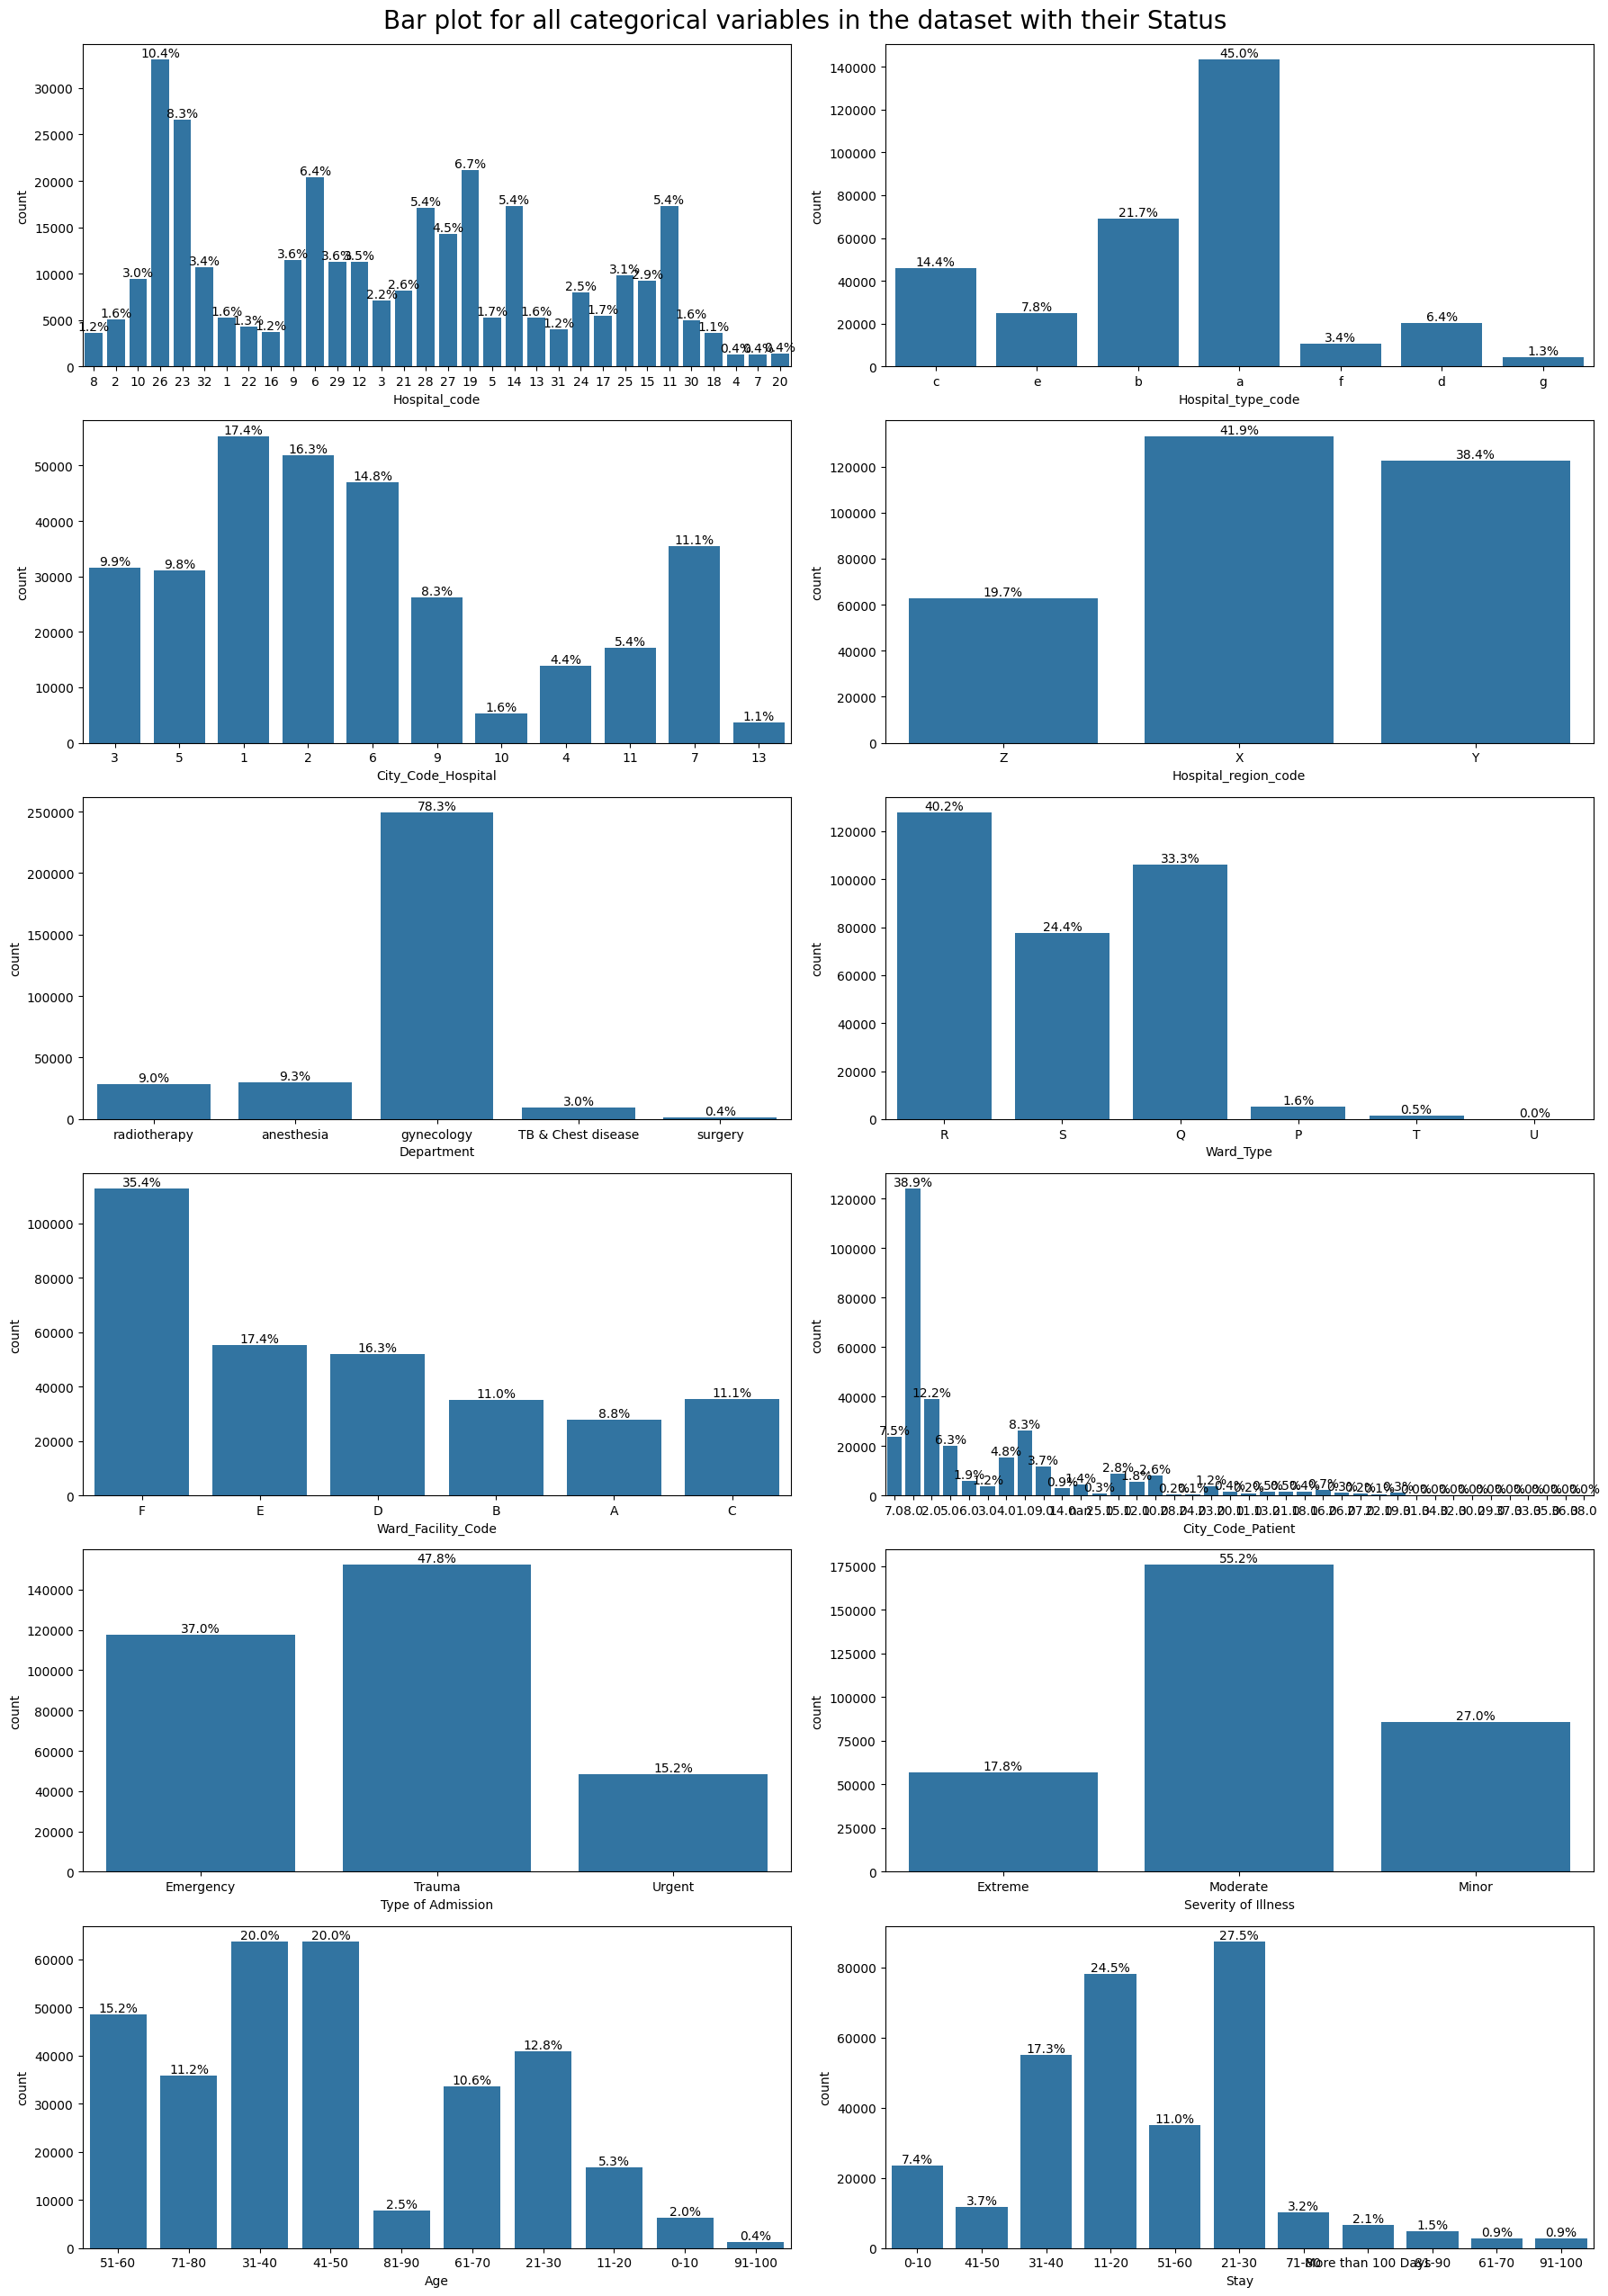

In [98]:
# Distribution of all Categorical columns
cat_col_train = df_train.select_dtypes(include=['object','category']).columns
print(f"Categorical Columns are : {cat_col_train}")
# Visualize Categorical columns 
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18, 26))
# Increase vertical spacing
plt.subplots_adjust(hspace=0.5)
# Set the supertitle
fig.suptitle('Bar plot for all categorical variables in the dataset with their Status\n', fontsize=20)
# Adjust the spacing between the supertitle and subplots
plt.subplots_adjust(top=0.95)
# Iterate over the columns and create count plots
for i, column in enumerate(cat_col_train):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=column, data=df_train) # , hue='Stay')
   
    total_count = len(df_train[column])

    for p in axes[row,col].patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        axes[row,col].annotate(percentage, (x_pos, y_pos), ha='center', va='bottom')
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

<Axes: >

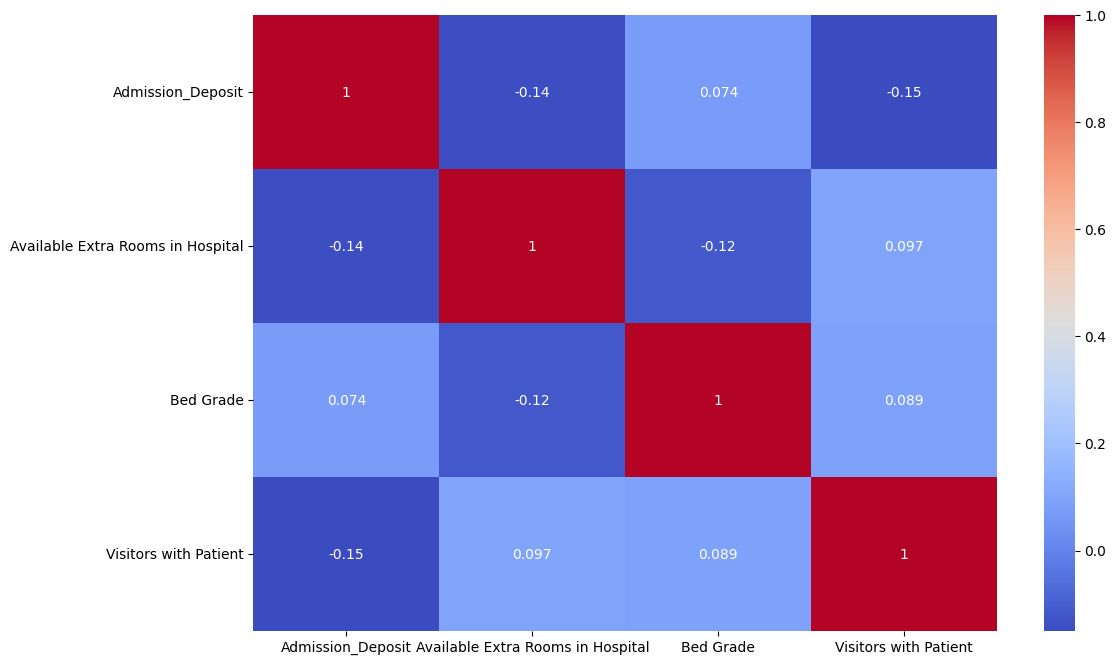

In [99]:
# Visualization of correlation in numerical columns
plt.figure(figsize=(12,8))
sns.heatmap(df_train[num_col_train].corr(),cbar = True, cmap='coolwarm', annot=True)

**Figure-:** Shows the Correlation of all Numerical Columns 

---
# Observation 4
There is no significance correlation in any numerical columns

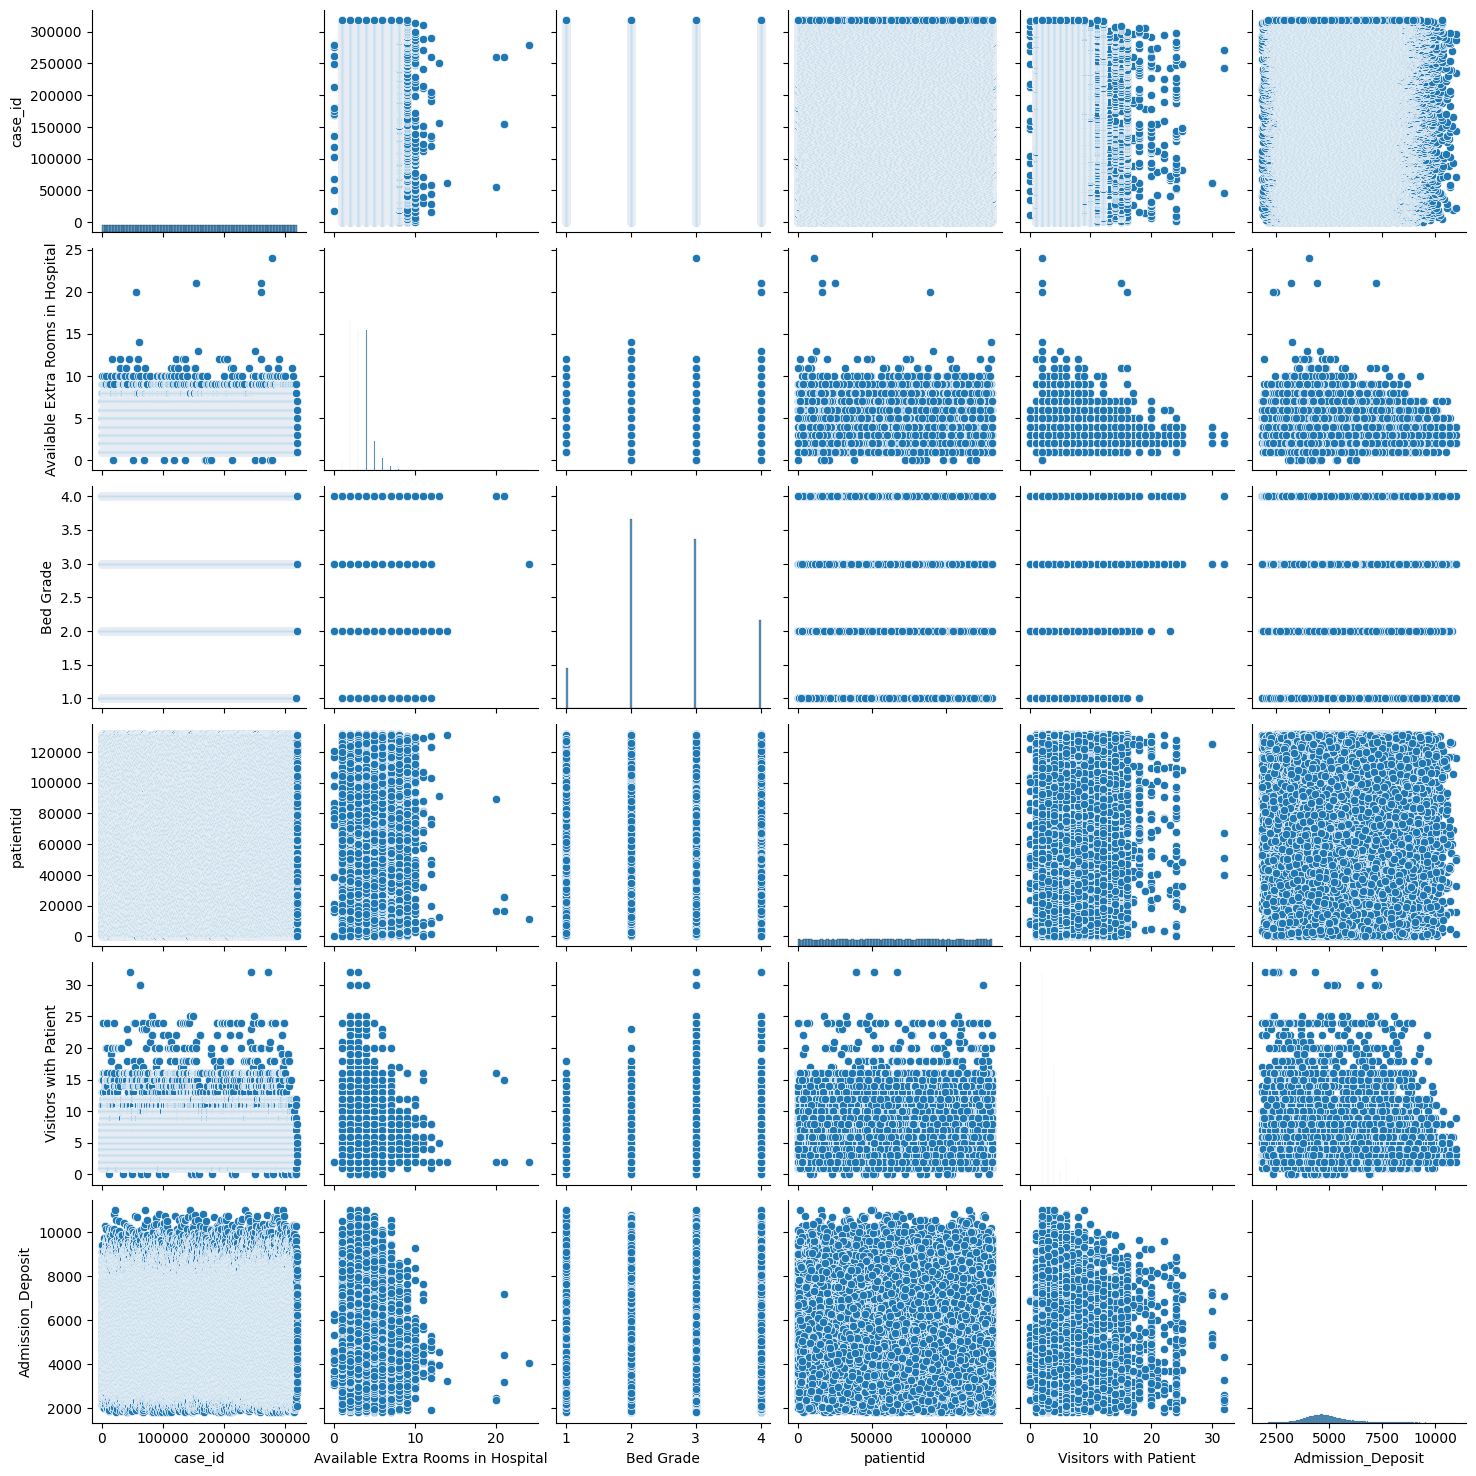

In [100]:
sns.pairplot(df_train)

In [101]:
import plotly.express as px
# piechart

df_pie = df_train['Stay'].value_counts().reset_index()
df_pie.columns = ['Stay', 'count']
fig_pie = px.pie(df_pie, values='count', names='Stay', title="Pie Plot showing distribution of the Length of Stay in the Hospital") #, category_orders={'Stay':'0-10'})

fig_pie.show()


---
# Observation 5
Maximum  cases of patients (27.5%) staying in Hospital  for 21-30 days, at 2nd number more cases of patients (24.5%) staying for 11-20 days, at 3rd number cases of patients (17.3%) staying are 31-40 days as shown in above pie chart.

In [102]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [103]:
# create sunburst plot on the dataset

# Create a sunburst plot

fig = px.sunburst(df_train, 
                  path=['Severity of Illness', 'Type of Admission','Department','Ward_Type', 'Stay'], 
                  values='Bed Grade' , color='Type of Admission', title="Chart shows the distribution of the Status ")
fig.update_layout(width = 800, height= 800)
# Show the plot
fig.show()


In [104]:
# Creating the Bar plot with hue
'''
sns.barplot(x=df_train['Department'], y=df_train['Stay'], hue=df_train['Severity of Illness'])

# Adding labels and title
plt.title('Department vs Number of Days Stay with Hue of Severity')
plt.xlabel('Department')
plt.ylabel('Number of Days Stay')

# Display the Bar plot
plt.show()
'''

"\nsns.barplot(x=df_train['Department'], y=df_train['Stay'], hue=df_train['Severity of Illness'])\n\n# Adding labels and title\nplt.title('Department vs Number of Days Stay with Hue of Severity')\nplt.xlabel('Department')\nplt.ylabel('Number of Days Stay')\n\n# Display the Bar plot\nplt.show()\n"

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier 
#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, log_loss, make_scorer

In [106]:
# train test split of dataset in python
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into features (X) and target variable (y)
X_train = df_train.drop(['Stay', 'case_id','patientid'], axis=1)  
y_train = df_train['Stay']  

X_test = df_test.drop(['case_id','patientid'], axis=1) 

# Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# Lets separate Numerical and categorical columns to visualize properly
num_col = X_train.select_dtypes(include=np.number).columns
cat_col = X_train.select_dtypes(include=['object']).columns

In [108]:
# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          # 'DecisionTreeClassifier' : (DecisionTreeClassifier(), {'criterion' : ['gini'],'max_depth': [None], 'splitter': ['best']}),
          'RandomForestClass' : (RandomForestClassifier(n_jobs= -1), {'criterion' : ['gini'],'n_estimators': [10], 'max_depth': [None]}),
          'AdaBoostClassifier' : (AdaBoostClassifier(), {'n_estimators': [10], 'algorithm': ['SAMME.R']}),
          # 'GradientBoostingClassifier' : (GradientBoostingClassifier(), {'criterion' : ['friedman_mse','squared_error'], 'n_estimators': [10]}),
          # 'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10], 'learning_rate': [0.1]}),          
          }

# Define the column transformer for preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), num_col),  # Replace with actual numeric column names
        ('categorical', OneHotEncoder(), cat_col)  # Replace with actual categorical column name
    ])

# LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

for name, (model, params) in models.items():
    # create a pipline
    # pipeline = GridSearchCV(model, params, cv=5)
    pipeline = Pipeline([
     ('preprocess', preprocessing),
     ('Imputer', SimpleImputer()),
     ('classify', GridSearchCV(model, params, cv=5, verbose=3))
    ])
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
    y_pred_prob = pipeline.predict_proba(X_test)
    # print the performing metric
    # Calculate accuracy
    print(f"Model Name: {name}")
    print("Best Parameters: ", pipeline.named_steps['classify'].best_params_)
    print("Best Score: ", pipeline.named_steps['classify'].best_score_)
    print("Best Estimator: ", pipeline.named_steps['classify'].best_estimator_)
   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.341 total time= 6.4min
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.342 total time= 7.6min
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.338 total time=18.3min
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.342 total time= 1.1min
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.331 total time= 1.1min
Model Name: RandomForestClass
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}
Best Score:  0.3388352505577247
Best Estimator:  RandomForestClassifier(n_estimators=10, n_jobs=-1)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END algorithm=SAMME.R, n_estimators=10;, score=0.372 total time=  18.6s
[CV 2/5] END algorithm=SAMME.R, n_estimators=10;, score=0.353 total time=  18.7s
[CV 3/5] END algorithm=SAMME.R, n_estimat

---
# Conclusion:
AdaBoostClassifier provided best accuracy score as compare to RandomForestClassifier
